<a href="https://colab.research.google.com/github/DorotaJanosz/machine-learning-bootcamp/blob/master/unsupervised/01_clustering/04_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(font_scale=1.2)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Wygenerowanie danych

In [2]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=10, centers=2, cluster_std=1.0, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

,x1,x2
0,1.986985,1.016248
1,-2.470776,6.745699
2,-0.428145,7.978864
3,2.699072,1.892783
4,-2.241511,6.977292


###Wizualizacja danych

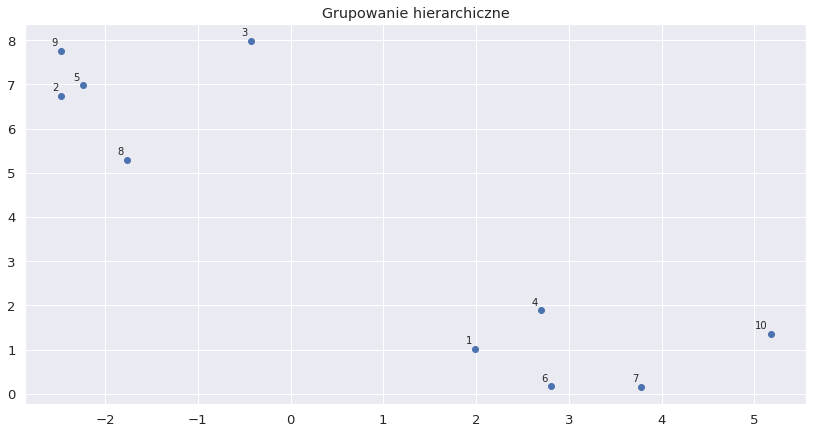

In [3]:
plt.figure(figsize=(14, 7))
plt.scatter(data[:,0], data[:,1])
plt.title('Grupowanie hierarchiczne')
for label, x, y in zip(range(1, 11), data[:, 0], data[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')

plt.show()

###Wizualizacja - dendrogram

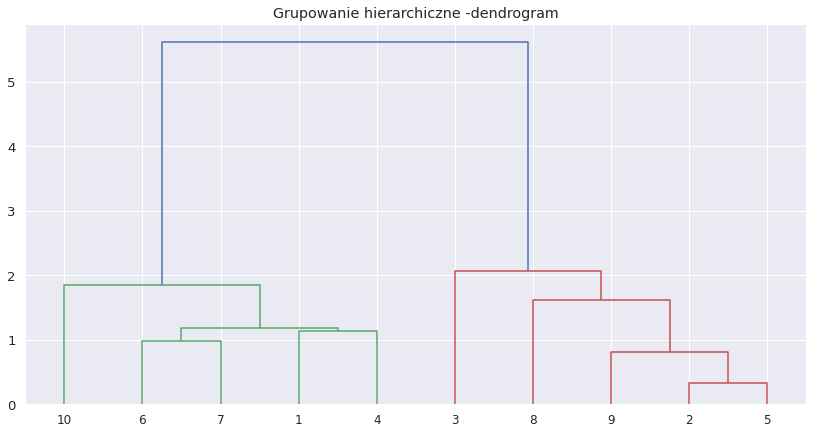

In [4]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# przeprowadzenie grupowania hierachicznego
linked = linkage(data)
 
# wizualizacja grupowanie hierarchicznego jako dendrogram
plt.figure(figsize=(14,7))
dendrogram(linked, orientation='top', labels=range(1,11), distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne -dendrogram')
plt.show()


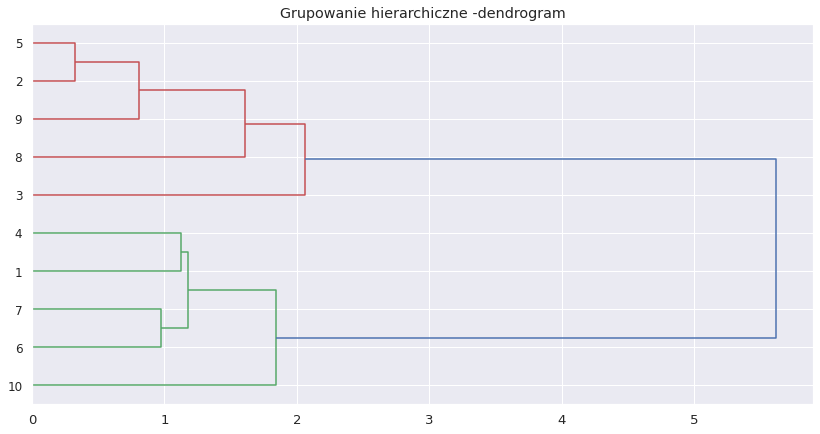

In [5]:
plt.figure(figsize=(14,7))
dendrogram(linked, orientation='right', labels=range(1,11), distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne -dendrogram')
plt.show()

###Grupowanie hierarchiczne

In [10]:
# bottom-up approach

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering()
cluster.fit_predict(data)
cluster.labels_

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

###Wizualizcja klastrów

In [22]:
df = pd.DataFrame(data, columns=['x1', 'x2'])
df['cluster'] = cluster.labels_
df.head()

fig = px.scatter(data_frame=df, x='x1', y='x2', color='cluster', template='plotly_dark', title='Grupowanie hierarchiczne', color_continuous_midpoint=0.6)
fig.update_traces(marker_size=12)
fig.show()

###Porówanie metryk (euklidesowa, Manhatta, kosinusowa)

In [24]:
data = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width=950, height=500, title='Grupowanie hierarchiczne', template='plotly_dark')


Odległość euklidesowa

In [25]:
cluster_euclidean = AgglomerativeClustering(n_clusters=4)
cluster_euclidean.fit_predict(data)

array([3, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3,
       3, 3, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 2, 1, 2, 3,
       2, 0, 0, 2, 3, 2, 1, 0, 2, 3, 0, 3, 0, 0, 0, 1, 1, 0, 1, 3, 2, 0,
       1, 1, 2, 0, 3, 0, 2, 1, 2, 3, 2, 0, 2, 0, 1, 0, 0, 0, 2, 3, 1, 1,
       0, 0, 0, 0, 2, 2, 3, 2, 3, 0, 2, 1, 2, 3, 3, 3, 0, 2, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 2, 1, 3, 1, 2, 0, 1, 3, 2, 3, 1, 2, 3, 1, 2, 0, 1,
       2, 3, 2, 0, 0, 1, 2, 2, 0, 0, 3, 3, 3, 2, 2, 0, 0, 0, 0, 3, 1, 1,
       0, 2, 0, 2, 2, 3, 1, 0, 2, 1, 0, 0, 2, 1, 3, 1, 2, 0, 0, 2, 0, 3,
       1, 3, 1, 3, 2, 2, 0, 1, 0, 1, 2, 3, 0, 1, 2, 0, 2, 2, 0, 0, 1, 1,
       1, 3, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 3, 1, 1, 2, 0, 1, 0, 3, 2,
       3, 3, 1, 0, 3, 0, 2, 1, 1, 0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 2, 1, 3,
       1, 2, 3, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 0, 1, 1, 2, 2, 2, 3, 2,
       3, 0, 1, 2, 0, 3, 2, 0, 2, 1, 0, 0, 2, 3, 1, 2, 3, 1, 3, 2, 1, 0,
       0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [31]:
df_euclidean = pd.DataFrame(data, columns=['x1', 'x2'])
df_euclidean['cluster'] = cluster_euclidean.labels_
df_euclidean.head()

px.scatter(df_euclidean, 'x1', 'x2', 'cluster', title='Grupowanie hierarchiczne - metryka euklidesowa', width=950, height=500, template='plotly_dark', color_continuous_midpoint=0.6)

Metryka Manhattan

In [51]:
cluster_manhattan = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='complete') 
cluster_manhattan.fit_predict(data)
AgglomerativeClustering()

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [35]:
df_manhattan = pd.DataFrame(data, columns=['x1', 'x2'])
df_manhattan['cluster'] = cluster_manhattan.labels_
df_manhattan.head()

px.scatter(df_manhattan, 'x1', 'x2', 'cluster', title='Grupowanie hierarchiczne - metryka Manhattan', width=950, height=500, template='plotly_dark', color_continuous_midpoint=0.6)

Odległość kosinusowa

In [36]:
cluster_cosine = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='complete') 
cluster_cosine.fit_predict(data)

array([2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 2, 3, 0, 0, 2,
       2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 0, 1, 0, 2,
       0, 2, 2, 0, 2, 0, 1, 3, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 3,
       1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1,
       2, 2, 2, 3, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 3, 0, 2, 1, 2,
       2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 1, 2, 3, 1, 3, 2, 0, 1, 2, 1, 0, 3, 2, 0, 2, 2,
       1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1, 0, 2, 0, 3, 2, 2, 1, 1,
       1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 0,
       2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2,
       1, 0, 2, 3, 3, 2, 0, 0, 3, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 3, 2, 0,
       2, 2, 1, 0, 3, 2, 0, 3, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 3,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,

In [37]:
df_cosine = pd.DataFrame(data, columns=['x1', 'x2'])
df_cosine['cluster'] = cluster_cosine.labels_
df_cosine.head()

px.scatter(df_cosine, 'x1', 'x2', 'cluster', title='Grupowanie hierarchiczne - metryka cosinusowa', width=950, height=500, template='plotly_dark', color_continuous_midpoint=0.6)

In [40]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3,column_titles=['euklidean', 'Manhattan', 'cosine'])

fig1 = px.scatter(df_euclidean, 'x1', 'x2', 'cluster')['data'][0]
fig2 = px.scatter(df_manhattan, 'x1', 'x2', 'cluster')['data'][0]
fig3 = px.scatter(df_cosine, 'x1', 'x2', 'cluster')['data'][0]

fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=1, col=2)
fig.add_trace(fig3, row=1, col=3)
fig.update_layout(template='plotly_dark')
fig.show()